# PackNet

In [1]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from PIL import Image
import shutil
import random
import time
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
from torchsummary import summary
from torchvision import transforms, datasets
import tensorflow
import tarfile, requests, os

from utils import *
from PackNet_models import *
from dataloader import *
import torchvision.models as models
set_all_seed(5)

## (Optional) For DomainNet Datasets, Run this

In [ ]:
domain1_train_loader, domain1_val_loader = load_domain1()
domain2_train_loader, domain2_val_loader = load_domain2()
domain3_train_loader, domain3_val_loader = load_domain3()

from torch.optim.sgd import SGD
from torch.optim.optimizer import required
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m,MaskedConv2d) or isinstance(m,MaskedMLP):
        m.reset_parameters()
        
# model = ResNet(3, BasicBlock, [2, 2, 2, 2]) #resnet18
model = MaskedResNet(3, MaskedBasicBlock, [2, 2, 2, 2]) #resnet18 for packnet
# model = LeNet5()
# model = MaskedLeNet5()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.apply(weight_reset)
summary(model, (3, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer1 = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)

# task 1
task_1 = [domain1_train_loader, domain1_val_loader]
# task 2
task_2 = [domain2_train_loader, domain2_val_loader]
# task 3
task_3 = [domain3_train_loader, domain3_val_loader]


## (Optional) For MNIST Datasets, Run this

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

Image Shape: torch.Size([1, 32, 32])
Training Set:   60000 samples
Validation Set:   10000 samples

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
      MaskedConv2d-1           [-1, 64, 32, 32]             576
       BatchNorm2d-2           [-1, 64, 32, 32]             128
      MaskedConv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
      MaskedConv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
  MaskedBasicBlock-7           [-1, 64, 32, 32]               0
      MaskedConv2d-8   

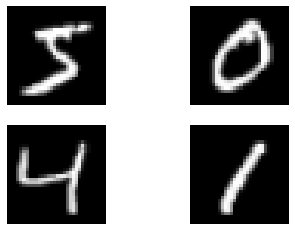

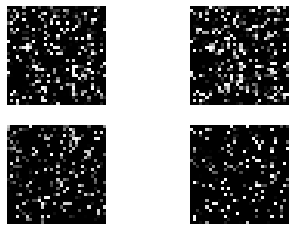

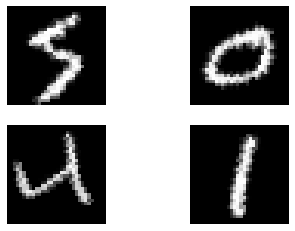

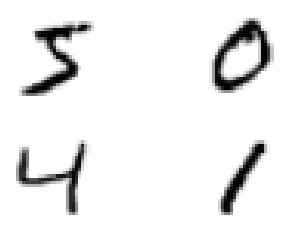

In [6]:
mnist_train_loader, mnist_val_loader = load_mnist()
permute_train_loader, permute_val_loader = load_permute_mnist()
rotated_train_loader, rotated_val_loader = load_rotated_mnist()
inverted_train_loader, inverted_val_loader = load_inverted_mnist()

from torch.optim.sgd import SGD
from torch.optim.optimizer import required
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m,MaskedConv2d) or isinstance(m,MaskedMLP):
        m.reset_parameters()
        

model = MaskedResNet(1, MaskedBasicBlock, [2, 2, 2, 2]) #resnet18
# model = ResNet(1, BasicBlock, [2, 2, 2, 2]) #resnet18
# model = MaskedLeNet5()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.apply(weight_reset)
summary(model, (1, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer1 = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)

# task 1
task_1 = [mnist_train_loader, mnist_val_loader]
# task 2
task_2 = [permute_train_loader, permute_val_loader]
# task 3
task_3 = [inverted_train_loader, inverted_val_loader]



## (Optional) For Food Datasets, Run this

Image Shape: torch.Size([4, 32, 32])
Training Set:   91 samples
Validation Set:   93 samples

Image Shape: torch.Size([4, 32, 32])
Training Set:   55 samples
Validation Set:   57 samples

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
      MaskedConv2d-1           [-1, 64, 32, 32]           2,304
       BatchNorm2d-2           [-1, 64, 32, 32]             128
      MaskedConv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
      MaskedConv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
  MaskedBasicBlock-7           [-1, 64, 32, 32]               0
      MaskedConv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
     MaskedConv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32,

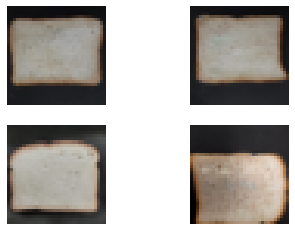

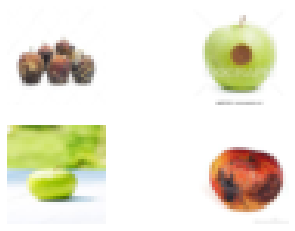

In [2]:
bread_train_loader, bread_val_loader = load_bread()
apple_train_loader, apple_val_loader = load_apple()

from torch.optim.sgd import SGD
from torch.optim.optimizer import required
import torch
import torch.nn.functional as F
import torch.optim as optim
import torch.nn as nn

def weight_reset(m):
    if isinstance(m, nn.Conv2d) or isinstance(m, nn.Linear) or isinstance(m,MaskedConv2d) or isinstance(m,MaskedMLP):
        m.reset_parameters()
        
# model = ResNet(4, BasicBlock, [2, 2, 2, 2]) #resnet18
model = MaskedResNet(4, MaskedBasicBlock, [2, 2, 2, 2]) #resnet18

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.apply(weight_reset)
summary(model, (4, 32, 32))


criterion = nn.CrossEntropyLoss()
optimizer1 = SGD(model.parameters(), lr=0.001, momentum=0.9, nesterov=True)


# task 1
task_1 = [bread_train_loader, bread_val_loader]
# task 2
task_2 = [apple_train_loader, apple_val_loader]


In [9]:
PackNet = True

accs_PackNet_A = []
accs_PackNet_B = []
accs_PackNet_C = []


# task list
tasks = [task_1, task_2, task_3]

EPOCHS =20
Prune_EPOCH = 10 #the epoch to start pruning for packnet

set_all_seed(5)

Bstep = BinaryStep.apply

    
#validation first
def train():
    
    #------------------------------------------------
    #            INITIAL VALIDATION b_i 
    #------------------------------------------------
    print('-'*85)
    B_i = []

    for id1, task in enumerate(tasks):
        correct_val = 0
        Train_loader1, Val_loader1 = tasks[id1] #data_loader of each task
        NB_TRAIN_EXAMPLES1 = len(Train_loader1.dataset)
        NB_VAL_EXAMPLES1 = len(Val_loader1.dataset)
        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader1:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

            val_acc =  correct_val / NB_VAL_EXAMPLES1
            B_i.append(val_acc)


        info = "[b_{}]: val-acc = {:0.6f}"
        print(info.format(id1+1, val_acc))
    print('-'*85)
    

    
    R_ii = []
    R_li = [] # R_(i-1)i
    for id2, task in enumerate(tasks):
        

        train_costs, val_costs = [], []


        optimizer = optimizer1
    
        Train_loader2, Val_loader2 = tasks[id2] #data_loader of each task
        NB_TRAIN_EXAMPLES2 = len(Train_loader2.dataset)
        NB_VAL_EXAMPLES2 = len(Val_loader2.dataset)
        #------------------------------------------------
        #        BEFORE TASK VALIDATION R_(i-1)i
        #------------------------------------------------
        
        correct_val = 0

        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader2:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

            val_acc =  correct_val / NB_VAL_EXAMPLES2
            R_li.append(val_acc)


        print('-'*85)
        info = "[R_{}{}]: val-acc = {:0.6f}"
        print(info.format(id2, id2+1, val_acc))


        #------------------------------------------------
        #                 TRAINING
        #------------------------------------------------

        
        #Training phase.
        for epoch in range(EPOCHS):

            # Measure the elapsed time of each epoch
            t0_epoch, t0_batch = time.time(), time.time()

            # PackNet
            if PackNet:
                if epoch == 0:
                    for layer in model.modules():
                        if isinstance(layer, MaskedMLP) or isinstance(layer, MaskedConv2d):
                            layer.freeze_mask = layer.mask  
                            
                if epoch == (EPOCHS-Prune_EPOCH): #calculate mask
                    for layer in model.modules():
                        if isinstance(layer, MaskedMLP) or isinstance(layer, MaskedConv2d):
                            Sparsity = (len(tasks)-id2-1)/(len(tasks)-id2)
                            layer.update_mask(sparsity = Sparsity)
                            layer.prune_mask = layer.mask
                    

            train_loss, correct_train = 0, 0
            batch_loss, correct_batch, batch_counts = 0, 0, 0

            if device == "cuda":
                model.train().cuda()

            for step, (inputs, labels) in enumerate(Train_loader2):

                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Zero the parameter gradients.
                optimizer.zero_grad()

                # Forward pass.
                prediction = model(inputs)

                # Compute the loss.
                loss = criterion(prediction, labels)


                # Backward pass.
                loss.backward()

                # PackNet
                if PackNet:
                    if id2 > 0: #freeze trained parameters
                        for layer in model.modules():
                            if isinstance(layer, MaskedMLP) or isinstance(layer, MaskedConv2d):
                                layer.weight.grad.data[layer.freeze_mask.type(torch.bool)] = 0
                                if layer.bias is not None:
                                    layer.bias.grad.data.fill_(0)
                            elif 'BatchNorm' in str(type(layer)):
                                # Set grads of batchnorm params to 0.
                                layer.weight.grad.data.fill_(0)
                                layer.bias.grad.data.fill_(0)
                                
                    if epoch >= (EPOCHS-Prune_EPOCH): #prune and train sparse
                        for layer in model.modules():
                            if isinstance(layer, MaskedMLP) or isinstance(layer, MaskedConv2d):
                                layer.weight.data[(1-layer.prune_mask).type(torch.bool)] = 0
                                layer.weight.grad.data[(1-layer.prune_mask).type(torch.bool)] = 0
#                                 layer.weight.data = layer.weight.to(device) * layer.prune_mask.to(device)
#                                 layer.weight.grad.data = layer.weight.grad.to(device) * layer.prune_mask.to(device)
                                
                                
                    
                                
                # Optimize.
                optimizer.step()

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_train += (predicted == labels).sum().item()
                correct_batch += (predicted == labels).sum().item()

                # Compute batch loss.
                batch_loss += (loss.data.item() * inputs.shape[0])
                train_loss += (loss.data.item() * inputs.shape[0])



                batch_counts += inputs.shape[0]

            train_loss /= NB_TRAIN_EXAMPLES2
            train_costs.append(train_loss)
            train_acc =  correct_train / NB_TRAIN_EXAMPLES2

            time_elapsed = time.time() - t0_epoch
            
                
            info = "[Epoch{}/{}]:train-loss={:0.6f} |train-acc={:0.6f} |time_elapsed={:0.2f}"
            print(info.format(epoch+1, EPOCHS, train_loss, train_acc, time_elapsed))
            
            #------------------------------------------------
            #            Epoch wise VALIDATION R_Ti 
            #------------------------------------------------

            for id3, task in enumerate(tasks):
                correct_val = 0

                Train_loader3, Val_loader3 = tasks[id3] #data_loader of each task
                NB_TRAIN_EXAMPLES3 = len(Train_loader3.dataset)
                NB_VAL_EXAMPLES3 = len(Val_loader3.dataset)
                if device == "cuda":
                    model.eval().cuda()

                with torch.no_grad():
                    for inputs, labels in Val_loader3:
                        # Load data to GPU.
                        inputs, labels = inputs.to(device), labels.to(device)

                        # Forward pass.
                        prediction = model(inputs)

                        # Compute training accuracy.
                        _, predicted = torch.max(prediction.data, 1)
                        correct_val += (predicted == labels).sum().item()

                    val_acc =  correct_val / NB_VAL_EXAMPLES3
                    info = "id{},acc{}"
                    print(id3, val_acc)
                
                if id3 == 0:
                    accs_PackNet_A.append(val_acc)
                if id3 == 1:
                    accs_PackNet_B.append(val_acc)
                if id3 == 2:
                    accs_PackNet_C.append(val_acc)


        #------------------------------------------------
        #              ON TASK VALIDATION R_ii
        #------------------------------------------------

        
        val_loss = 0
        correct_val = 0

        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader2:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute the loss.
                loss = criterion(prediction, labels)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

                # Compute batch loss.
                val_loss += (loss.data.item() * inputs.shape[0])

            val_loss /= NB_VAL_EXAMPLES2
            val_costs.append(val_loss)
            val_acc =  correct_val / NB_VAL_EXAMPLES2
            R_ii.append(val_acc)


        print('-'*85)
        info = "[R_{}{}]: val-acc = {:0.6f}"
        print(info.format(id2+1, id2+1, val_acc))
        
    #------------------------------------------------
    #            FINAL VALIDATION R_Ti 
    #------------------------------------------------

        
    R_Ti = []
    
    for id4, task in enumerate(tasks):
        correct_val = 0
        
        Train_loader4, Val_loader4 = tasks[id4] #data_loader of each task
        NB_TRAIN_EXAMPLES4 = len(Train_loader4.dataset)
        NB_VAL_EXAMPLES4 = len(Val_loader4.dataset)
        if device == "cuda":
            model.eval().cuda()

        with torch.no_grad():
            for inputs, labels in Val_loader4:
                # Load data to GPU.
                inputs, labels = inputs.to(device), labels.to(device)

                # Forward pass.
                prediction = model(inputs)

                # Compute training accuracy.
                _, predicted = torch.max(prediction.data, 1)
                correct_val += (predicted == labels).sum().item()

            val_acc =  correct_val / NB_VAL_EXAMPLES4
            R_Ti.append(val_acc)

        print('-'*85)
        info = "[R_T{}]: val-acc = {:0.6f}"
        print(info.format(id4+1, val_acc))

    #------------------------------------------------
    #                 EVALUATION 
    #------------------------------------------------
    ACC = np.mean(R_Ti)
    BWT = 0
    for r_ti,r_ii in zip(R_Ti, R_ii):
        BWT += r_ti - r_ii
    BWT = BWT/(len(R_Ti)-1)
    FWT = 0
    for r_li,b_i in zip(R_li,B_i):
        FWT += r_li - b_i
    FWT = FWT/(len(B_i)-1)
    
    print('-'*85)
    info = "ACC = {}, BWT = {}, FWT = {}"
    print(info.format(ACC, BWT, FWT))
    

    
#packnet MNIST Strong
train()
print(accs_PackNet_A)
print(accs_PackNet_B)
print(accs_PackNet_C)

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.095200
[b_2]: val-acc = 0.096700
[b_3]: val-acc = 0.113800
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.095200
[Epoch1/20]:train-loss=0.193393 |train-acc=0.948967 |time_elapsed=63.05
0 0.9875
1 0.0811
2 0.4864
[Epoch2/20]:train-loss=0.028797 |train-acc=0.992533 |time_elapsed=63.06
0 0.9911
1 0.0811
2 0.4712
[Epoch3/20]:train-loss=0.011885 |train-acc=0.997900 |time_elapsed=63.08
0 0.9923
1 0.0844
2 0.4418
[Epoch4/20]:train-loss=0.004768 |train-acc=0.999583 |time_elapsed=63.01
0 0.993
1 0.0807
2 0.4301
[Epoch5/20]:train-loss=0.002270 |train-acc=0.999933 |time_elapsed=63.02
0 0.9932
1 0.0829
2 0.4241
[Epoch6/20]:train-loss=0.001334 |train-acc=1.000000 |time_elapsed=63.00
0 0.9931
1 0.0825
2 0.4173
[Epoch7/20]:train-loss=0.000959 |train-acc=1

In [13]:
#packnet MNIST mild 20 Lenet
train()
print(accs_PackNet_A)
print(accs_PackNet_B)
print(accs_PackNet_C)

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.101000
[b_2]: val-acc = 0.101000
[b_3]: val-acc = 0.101000
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.101000
[Epoch1/20]:train-loss=1.986018 |train-acc=0.277050 |time_elapsed=12.57
0 0.7827
1 0.0887
2 0.0087
[Epoch2/20]:train-loss=0.417642 |train-acc=0.871533 |time_elapsed=12.60
0 0.8974
1 0.089
2 0.0055
[Epoch3/20]:train-loss=0.278532 |train-acc=0.912950 |time_elapsed=12.57
0 0.9236
1 0.0889
2 0.0064
[Epoch4/20]:train-loss=0.215504 |train-acc=0.932433 |time_elapsed=14.70
0 0.9374
1 0.0885
2 0.0102
[Epoch5/20]:train-loss=0.176046 |train-acc=0.945633 |time_elapsed=12.54
0 0.9482
1 0.087
2 0.0149
[Epoch6/20]:train-loss=0.149198 |train-acc=0.953550 |time_elapsed=14.64
0 0.9528
1 0.0851
2 0.0214
[Epoch7/20]:train-loss=0.129943 |train-acc=0.

In [4]:
#packnet MNIST mild 20
train()
print(accs_PackNet_A)
print(accs_PackNet_B)
print(accs_PackNet_C)

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.095200
[b_2]: val-acc = 0.096700
[b_3]: val-acc = 0.098500
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.095200
[Epoch1/20]:train-loss=0.193393 |train-acc=0.948967 |time_elapsed=60.14
0 0.9875
1 0.0811
2 0.8518
[Epoch2/20]:train-loss=0.028797 |train-acc=0.992533 |time_elapsed=60.14
0 0.9911
1 0.0811
2 0.8653
[Epoch3/20]:train-loss=0.011885 |train-acc=0.997900 |time_elapsed=60.26
0 0.9923
1 0.0844
2 0.8693
[Epoch4/20]:train-loss=0.004768 |train-acc=0.999583 |time_elapsed=60.23
0 0.993
1 0.0807
2 0.8721
[Epoch5/20]:train-loss=0.002270 |train-acc=0.999933 |time_elapsed=60.24
0 0.9932
1 0.0829
2 0.8816
[Epoch6/20]:train-loss=0.001334 |train-acc=1.000000 |time_elapsed=60.22
0 0.9931
1 0.0825
2 0.8756
[Epoch7/20]:train-loss=0.000959 |train-acc=1

In [4]:
#packnet Food 30 epochs reverse
train()
print(accs_PackNet_A)
print(accs_PackNet_B)
print(accs_PackNet_C)

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.052632
[b_2]: val-acc = 0.021505
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.052632
[Epoch1/30]:train-loss=2.193080 |train-acc=0.290909 |time_elapsed=0.33
0 0.5087719298245614
1 0.46236559139784944
[Epoch2/30]:train-loss=1.238407 |train-acc=0.527273 |time_elapsed=0.37
0 0.6140350877192983
1 0.46236559139784944
[Epoch3/30]:train-loss=0.720825 |train-acc=0.763636 |time_elapsed=0.34
0 0.8596491228070176
1 0.46236559139784944
[Epoch4/30]:train-loss=0.423671 |train-acc=0.927273 |time_elapsed=0.33
0 0.8947368421052632
1 0.43010752688172044
[Epoch5/30]:train-loss=0.239040 |train-acc=0.981818 |time_elapsed=0.35
0 0.9473684210526315
1 0.45161290322580644
[Epoch6/30]:train-loss=0.134968 |train-acc=1.000000 |time_elapsed=0.38
0 0.9649122807017544
1

In [4]:
#packnet Food 30 epochs
train()
print(accs_PackNet_A)
print(accs_PackNet_B)
print(accs_PackNet_C)

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.021505
[b_2]: val-acc = 0.052632
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.021505
[Epoch1/30]:train-loss=1.860842 |train-acc=0.340659 |time_elapsed=3.23
0 0.5376344086021505
1 0.5087719298245614
[Epoch2/30]:train-loss=0.965860 |train-acc=0.615385 |time_elapsed=3.23
0 0.8709677419354839
1 0.45614035087719296
[Epoch3/30]:train-loss=0.572264 |train-acc=0.890110 |time_elapsed=3.22
0 0.8924731182795699
1 0.3684210526315789
[Epoch4/30]:train-loss=0.347062 |train-acc=0.923077 |time_elapsed=3.22
0 0.978494623655914
1 0.38596491228070173
[Epoch5/30]:train-loss=0.185740 |train-acc=1.000000 |time_elapsed=3.20
0 0.978494623655914
1 0.40350877192982454
[Epoch6/30]:train-loss=0.103427 |train-acc=1.000000 |time_elapsed=3.21
0 0.978494623655914
1 0.42

In [4]:
#packnet domainnet 30 epochs
train()
print(accs_PackNet_A)
print(accs_PackNet_B)
print(accs_PackNet_C)

-------------------------------------------------------------------------------------
[b_1]: val-acc = 0.110000
[b_2]: val-acc = 0.165000
[b_3]: val-acc = 0.160000
-------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------
[R_01]: val-acc = 0.110000
[Epoch1/30]:train-loss=1.837633 |train-acc=0.421750 |time_elapsed=18.10
0 0.6175
1 0.16
2 0.18
[Epoch2/30]:train-loss=0.948058 |train-acc=0.711743 |time_elapsed=13.61
0 0.7525
1 0.155
2 0.19
[Epoch3/30]:train-loss=0.612512 |train-acc=0.824832 |time_elapsed=13.61
0 0.7675
1 0.17
2 0.17
[Epoch4/30]:train-loss=0.364615 |train-acc=0.914478 |time_elapsed=13.58
0 0.7775
1 0.15
2 0.19
[Epoch5/30]:train-loss=0.172209 |train-acc=0.976123 |time_elapsed=13.51
0 0.78
1 0.175
2 0.2
[Epoch6/30]:train-loss=0.068591 |train-acc=0.997395 |time_elapsed=13.64
0 0.77
1 0.19
2 0.19
[Epoch7/30]:train-loss=0.030341 |train-acc=1.000000 |time_elapsed=13.6